# Lesson 2) Data Preparation and Preprocessing

***
## Chapter 1) Exploring Data
***

### 1.1 Understanding the data and its characteristics

#### Understanding the data and its characteristics is a critical step in the machine learning process. Before starting any analysis, it is important to have a clear understanding of the data being used. This includes knowing the data types, such as numerical, categorical, or text, and understanding any potential limitations or biases in the data.

#### Domain knowledge and understanding of the data are also essential in machine learning. Without proper domain knowledge, it is difficult to understand the nuances of the data and make informed decisions during the analysis process. Additionally, understanding the data can help to identify potential problems or limitations in the data that may impact the accuracy of the analysis. Overall, understanding the data is a foundational step in the machine learning process and is essential for producing accurate and reliable results.

<img src="images/lesson_2/img_1.jpg" alt="Alternative text" />

***
### 1.2 Load datasets using pandas

In [1]:
# Pandas is a Python library used for data manipulation and analysis.
# It provides data structures and functions to work with structured data, such as data frames and series
import pandas as pd

# Load csv file using read_csv() method
dataframe = pd.read_csv('data/dataset_example.csv')

# View the first 5 rows
dataframe.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
# show dataframe columns
dataframe.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [3]:
# show dataframe data types
dataframe.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***
### 1.3 Visualizing data using plots and charts

#### In machine learning, visualizing data is an essential step to understand the relationships and patterns that exist within the data. Python libraries such as <b>Matplotlib</b> and <b>Seaborn</b> provide powerful tools to create visualizations of different types of data. Scatter plots are useful to identify relationships between two continuous variables, while histograms and bar charts are great for understanding the distribution of data or comparing categorical variables. It is important to choose the right type of visualization for the specific data and question at hand. By visualizing data, we can better understand its structure and use this understanding to inform the next steps in the machine learning process.

In [4]:
# import the requried libraries using 'import'
import matplotlib.pyplot as plt
import seaborn as sns
# numpy is a Python library used for numerical computations. 
# It provides a multidimensional array object, as well as functions to perform mathematical operations on these arrays efficiently.
import numpy as np

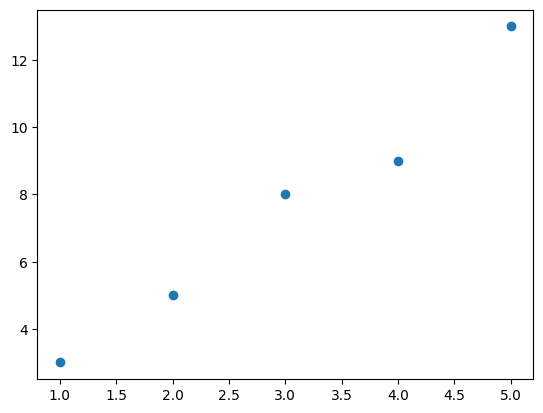

In [5]:
# declare some random points to be plotted
x = [1, 2, 3, 4, 5]
y = [3, 5, 8, 9, 13]

# to create a scatter plot, we can use the scatter function in Matplotlib
plt.scatter(x,y)
# plt.plot(x,y)
plt.show()

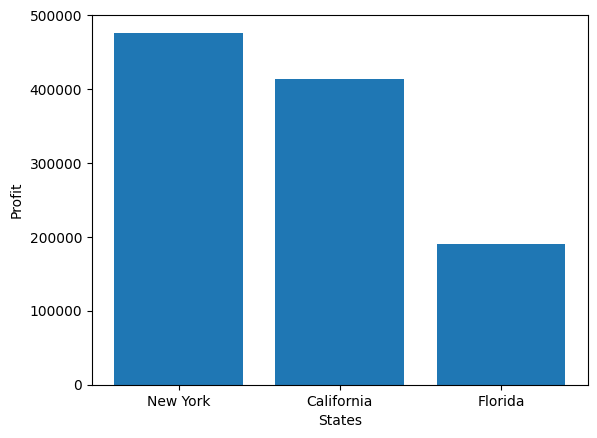

In [6]:
# get the States and Profits data from the dataset columns
states = dataframe['State']
profit = dataframe['Profit']

# plot a bar using them
plt.bar(states, profit)

# add axis labels
plt.xlabel('States')
plt.ylabel('Profit')
plt.show()

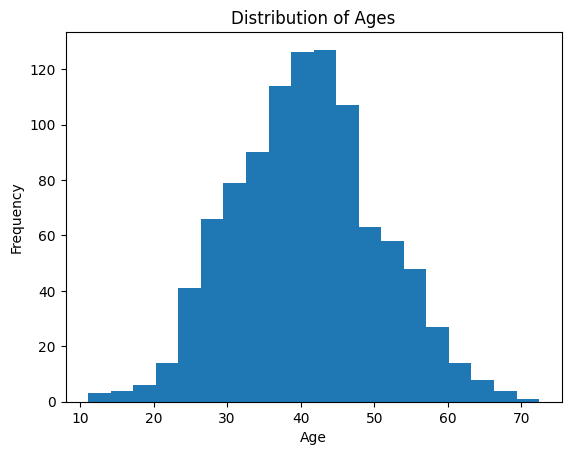

In [7]:
# this line generates an array of 1000 normally distributed random numbers with a mean of 40 and standard deviation of 10, which can be used to simulate a dataset of ages.
ages = np.random.normal(40, 10, 1000)

# create a histogram with 20 bins (affect the appearance and interpretation of the histogram)
plt.hist(ages, bins=20)

# add axis labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

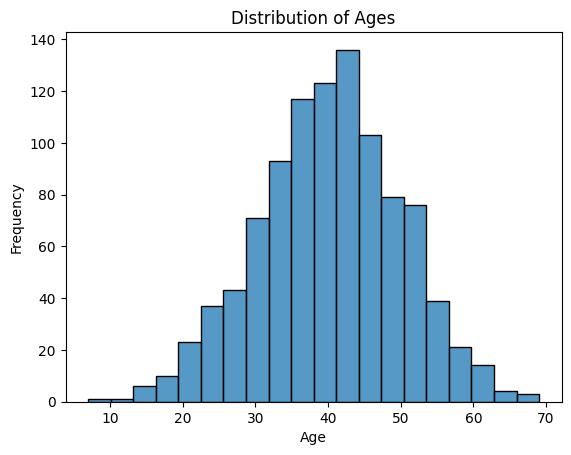

In [8]:
# generate some random data
ages = np.random.normal(40, 10, 1000)

# create a histogram using Seaborn
sns.histplot(ages, bins=20)

# add axis labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

***
## Chapter 2) Data Cleaning and Preprocessing
***

### 2.1 Removing duplicates and irrelevant data

#### Duplicates in data refer to instances where there are two or more identical records or observations. Duplicates can be problematic for several reasons. First, they can cause <b>errors in data analysis</b> because they increase the weight of the duplicated observations, leading to incorrect conclusions. Secondly, duplicates can also impact the efficiency of data storage, as it takes up <b>unnecessary space</b>. Finally, duplicates can also cause confusion and can make it challenging to maintain data quality and consistency. Therefore, removing duplicates is an essential step in data cleaning and preparation to ensure accurate and meaningful analysis.

In [9]:
import pandas as pd

# suppose we have a dataframe with a column called Name and we want to identify and remove any duplicate names in the dataset
data = pd.DataFrame({'Name': ['John', 'Jane', 'Joe', 'John', 'Joe']})

# identify the duplicates using the duplicated() method to identify the duplicates
# the subest=['Name'] parameter specifies which columns to consider when removing duplicates
duplicates = data.duplicated(subset=['Name'])

# remove the duplicates using the drop_duplicates() method to remove the identified duplicates
# inplace=True modifies the dataframe directly (so our data) without creating a new object
data.drop_duplicates(subset=['Name'], inplace=True)

data

,Name
0,John
1,Jane
2,Joe


#### Identifying and removing irrelevant data is important in data cleaning and preprocessing because irrelevant data can affect the <b>accuracy and performance</b> of a machine learning model. Irrelevant data can introduce noise and bias to the model, which can lead to incorrect predictions and poor performance.
#### Irrelevant data can take many forms, such as data that is not related to the target variable or data that is not representative of the population being studied. Removing irrelevant data can <b>improve the quality of the dataset, reduce the dimensionality of the feature space, and make the model more efficient</b>.
#### Furthermore, irrelevant data can also lead to overfitting, which occurs when a model is too complex and fits the training data too closely. Overfitting can cause the model to perform poorly on new data, which defeats the purpose of building a machine learning model.

***
### 2.2 Identifying missing values and dealing with them

#### Identifying missing values in the data is essential as it can affect the performance of machine learning models. Missing values can result in <b>biased or incorrect results</b>, which can mislead the data analysis process. Therefore, it is <b>crucial</b> to identify missing data and handle it appropriately. In machine learning, missing data can be dealt with by imputing the missing values or deleting the rows or columns with missing data. Choosing the right strategy depends on the data set and the specific problem being addressed.

#### Suppose we have a small dataset of three samples with two features, and one of the samples has a missing value:


In [10]:
import pandas as pd

# create a dataset with a missing value
data = pd.DataFrame({'Feature 1': [2.3, 1.8, None], 'Feature 2': [4.5, 3.6, 2.1]})
data

,Feature 1,Feature 2
0,2.3,4.5
1,1.8,3.6
2,NaN,2.1


In [11]:
# isnull() function is going to identify the missing value
data.isnull()

,Feature 1,Feature 2
0,False,False
1,False,False
2,True,False


#### We can see that the missing value in the third sample is identified as "True", so we can use Pandas fillna() function to replace the missing value with a value of our choice, such as the mean of the feature:

In [12]:
mean = data['Feature 1'].mean()
# inplace=True modifies the dataframe directly (so our data) without creating a new object
data.fillna(mean, inplace=True)

data

,Feature 1,Feature 2
0,2.30,4.5
1,1.80,3.6
2,2.05,2.1


#### In the missing value example, 'mean' refers to the average value of the non-missing data in the 'Feature 1' array. The line of code <b>data['Feature 1'].mean()</b> calculates the mean value. This value is used in the next line of code <b>data.fillna(mean, inplace=True)</b> to replace the missing values (NaN) in the 'Feature 1' array with the mean value. Replacing missing values with the mean is a form of imputation, which is a common technique used to handle missing data.

***
### 2.3 Feature scaling and normalization

#### In data preprocessing, feature scaling and normalization refer to techniques used to <b>standardize the range and/or distribution of features or variables in a dataset</b>. This is important because many machine learning algorithms rely on the assumption that all features are equally important and are on the same scale.
#### Feature scaling refers to the process of rescaling the range of values in a feature to <b>fit within a specific range</b>. For example, if one feature has a range of 0 to 100 and another has a range of 0 to 100,000, the latter feature will dominate the analysis even if it is not necessarily more important.
#### Normalization refers to the process of rescaling the values of a feature to a <b>range between 0 and 1</b>. This is achieved by subtracting the minimum value of the feature and dividing by the range (i.e., the difference between the maximum and minimum values). Normalization is a useful technique when the distribution of the feature is unknown or highly skewed.
#### Overall by scaling and normalizing our data, we can <b>ensure that each feature contributes equally to the analysis</b> and that our models are not biased towards features with larger scales. This can lead to more accurate and reliable results.

***
#### Scaling example)

In [13]:
"""
Example 1: Scaling
Suppose we have a dataset with two features, 'Age' and 'Income', and we want to 
scale the features to have a mean of zero and a standard deviation of one.
"""

# import the required libraries
# sklearn is a widely used machine learning library in Python.
# it provides a large range of useful tools for pre-processing, classification and alot more.
# StandardScaler is used to standardize a dataset by removing the mean and scaling the data to unit variance.
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
# create a sample dataset
data = {'Age': [25, 30, 35, 40, 45],
        'Income': [50000, 60000, 70000, 80000, 90000]}
dataframe = pd.DataFrame(data)
dataframe

,Age,Income
0,25,50000
1,30,60000
2,35,70000
3,40,80000
4,45,90000


In [15]:
# create a StandardScaler object and fit it to the dataset
scaler = StandardScaler()
scaler.fit(dataframe)

# transform the dataset using the fitted scaler
dataframe_scaled = scaler.transform(dataframe)
dataframe_scaled

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

***
#### Normalization example)

In [16]:
"""
Example 2: Normalization
Suppose we have a dataset with two features, 'Height' and 'Weight', and we want 
to normalize the features to have a range of [0, 1].
"""
# import the required libraries
# MinMaxScaler is used to scale numerical features in a dataset to a specified range, usually between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [17]:
# create a sample dataset
data = {'Height': [150, 160, 170, 180, 190],
        'Weight': [50, 60, 70, 80, 90]}
dataframe = pd.DataFrame(data)
dataframe

,Height,Weight
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [18]:
# create a MinMaxScaler object and fit it to the dataset
scaler = MinMaxScaler()
scaler.fit(dataframe)

# transform the dataset using the fitted scaler
dataframe_normalized = scaler.transform(dataframe)
dataframe_normalized

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

***
## Chapter 3) Data Sampling and Splitting
***

### 3.1 Introduction to data sampling and splitting

#### When working with machine learning models, we often need to split our data into different subsets for various purposes. One common use case is to divide our data into a training set and a testing set. We use the training set to train our model and the testing set to evaluate its performance on new, unseen data.

***
### 3.2 Types of sampling and splitting our data

#### Before we split our data, we need to decide how to sample it. There are different sampling techniques that we can use depending on the nature of our data and the problem we are trying to solve.

* <h4> Random sampling: selecting a random subset of data points from the entire dataset.</h4>
* <h4> Stratified sampling: selecting a random subset of data points that preserves the original class proportions. This is useful when we have imbalanced classes in our dataset.</h4>
* <h4> Oversampling: adding more data points from the minority class to balance the class proportions.</h4>
* <h4> Undersampling: removing data points from the majority class to balance the class proportions.</h4>

#### After sampling our data, we split it into different subsets for training and evaluation. We can split our data into three subsets:
* <h4> Training set: used to train the model</h4>
* <h4> Validation set: used to tune the hyperparameters of the model and evaluate its performance during training</h4>
* <h4> Testing set: used to evaluate the final performance of the trained model on new, unseen data</h4>
#### We need to be careful not to use the testing set for any kind of training or tuning, as this can lead to overfitting and inaccurate performance estimates.

<img src="images/lesson_2/img_2.jpg" height=650px, width=870px  />

In [19]:
# import required libraries
import pandas as pd
# train_test_split function is used for splitting a dataset
from sklearn.model_selection import train_test_split
# resample function is used for upsampling or downsampling a dataset
from sklearn.utils import resample

In [20]:
# create a sample dataset
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Henry'],
    'gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F', 'M'],
    'age': [20, 19, 21, 20, 19, 21, 20, 22],
    'subject': ['Math', 'English', 'History', 'Chemistry', 'Biology', 'Computer Science', 'Math', 'Physics'],
    'grade': [3.7, 4.2, 5.6, 8.3, 2.3, 7.5, 9.0, 3.9],
    'graduated': [False, False, True, True, False, True, True, False]
}
dataframe = pd.DataFrame(data)
dataframe

,name,gender,age,subject,grade,graduated
0,Alice,F,20,Math,3.7,False
1,Bob,M,19,English,4.2,False
2,Charlie,M,21,History,5.6,True
3,David,M,20,Chemistry,8.3,True
4,Emma,F,19,Biology,2.3,False
5,Frank,M,21,Computer Science,7.5,True
6,Grace,F,20,Math,9.0,True
7,Henry,M,22,Physics,3.9,False


***
#### Random Sampling)

In [21]:
# split the data randomly into training and testing sets
# sample function is used to randomly sample the data from the DataFrame
# frac=0.8 means that 80% of the rows in the DataFrame will be randomly selected for the training dataset
# random_state is used to set the random seed
train_data = dataframe.sample(frac=0.8, random_state=1)
# drop function is used to remove the train_data rows, so 20% remains and is set for the test set
test_data = dataframe.drop(train_data.index)

In [22]:
train_data

,name,gender,age,subject,grade,graduated
7,Henry,M,22,Physics,3.9,False
2,Charlie,M,21,History,5.6,True
1,Bob,M,19,English,4.2,False
6,Grace,F,20,Math,9.0,True
0,Alice,F,20,Math,3.7,False
4,Emma,F,19,Biology,2.3,False


In [23]:
test_data

,name,gender,age,subject,grade,graduated
3,David,M,20,Chemistry,8.3,True
5,Frank,M,21,Computer Science,7.5,True


***
#### Stratified Sampling)

In [24]:
# split the dataframe stratified by the 'gender' column
# test_size=0.2 meaning 20% for the test data
# random_state is used to set the random seed
# stratify argument ensures that the proportion of male and female students is maintained in both the training and testing sets
train_data, test_data = train_test_split(dataframe, test_size=0.2, random_state=1, stratify=dataframe['gender'])

In [25]:
train_data

,name,gender,age,subject,grade,graduated
5,Frank,M,21,Computer Science,7.5,True
3,David,M,20,Chemistry,8.3,True
6,Grace,F,20,Math,9.0,True
2,Charlie,M,21,History,5.6,True
0,Alice,F,20,Math,3.7,False
1,Bob,M,19,English,4.2,False


In [26]:
test_data

,name,gender,age,subject,grade,graduated
4,Emma,F,19,Biology,2.3,False
7,Henry,M,22,Physics,3.9,False


***
#### Oversampling)

In [27]:
# Separate the majority and minority classes
df_majority = dataframe[dataframe.gender=='M']
df_minority = dataframe[dataframe.gender=='F']

# Upsample the minority class
# n_samples is set to the length of the minority class
# replace argument specifies that data points from the minority class will be selected more than once
# random_state is used to set the random seed
df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=1)

# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [28]:
df_oversampled

,name,gender,age,subject,grade,graduated
1,Bob,M,19,English,4.2,False
2,Charlie,M,21,History,5.6,True
3,David,M,20,Chemistry,8.3,True
5,Frank,M,21,Computer Science,7.5,True
7,Henry,M,22,Physics,3.9,False
4,Emma,F,19,Biology,2.3,False
0,Alice,F,20,Math,3.7,False
0,Alice,F,20,Math,3.7,False
4,Emma,F,19,Biology,2.3,False
4,Emma,F,19,Biology,2.3,False


***
#### Undersampling)

In [29]:
# Separate the majority and minority classes
df_majority = dataframe[dataframe.gender=='M']
df_minority = dataframe[dataframe.gender=='F']

# Downsample the majority class
# n_samples is set to the length of the minority class
# replace argument specifies that data points from the majority class will not be selected more than once
# random_state is used to set the random seed
df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=1)

# Combine majority class with undersampled minority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])


In [30]:
df_undersampled

,name,gender,age,subject,grade,graduated
0,Alice,F,20,Math,3.7,False
4,Emma,F,19,Biology,2.3,False
6,Grace,F,20,Math,9.0,True
3,David,M,20,Chemistry,8.3,True
2,Charlie,M,21,History,5.6,True
7,Henry,M,22,Physics,3.9,False


***
#### Sampling is a process of selecting a subset of data from a larger dataset. The purpose of sampling is to reduce the computational burden by working with a smaller representative subset of the original data. Sampling can be random, stratified, oversampling or undersampling.

#### Splitting is a process of dividing a dataset into two or more subsets, such as training and testing sets, validation sets, or cross-validation sets. The purpose of splitting is to evaluate the performance of a machine learning model on an independent dataset. Splitting can be done randomly or non-randomly, and can involve dividing the data into fixed proportions or using other criteria.

#### In summary, sampling is used to create a smaller subset of data, while splitting is used to divide a dataset into subsets for machine learning model training and evaluation.

***
#### Dataset splitting example)

In [31]:
# Split the data into train and test sets
train_data, test_data = train_test_split(dataframe, test_size=0.2, random_state=1, stratify=dataframe['gender'])

# Split the train data into train and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=1, stratify=train_data['gender'])

# Print the sizes of the resulting sets
print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

Train size: 4
Validation size: 2
Test size: 2
